In [1]:
#import Librarires 
import pandas as pd

In [2]:
#import dataset , give path to dataset
data = pd.read_excel(r'C:\Users\Lenovo\Downloads\Customer Category Data.xlsx')

In [3]:
#do not change , removing negative vales(returns)
data = data[data['Amount (Gross)']<0]

NumExpr defaulting to 6 threads.


In [4]:
#do not change
data['Amount (Gross)'] = data['Amount (Gross)'].abs()

In [5]:
#do not change
data['Quantity'] = data['Quantity'].abs()

In [6]:
#Available Categories
data['Customer Category: Name'].unique()

array(['Residential', 'OT/PT', 'Acute Care', 'Education', 'Black Listed',
       'Commercial', 'Residential Kids', 'Non Profit',
       'Non Acute Care Facilities', 'Hospice', 'County / Regional',
       'DDSO', 'Federal Agencies', 'International', 'Non Profit-UCP',
       'VA Facilities', 'Non Profit - Make-A-Wish', 'State Agencies',
       'Internal - Mes', 'HHP Client', 'Early Intervention Program',
       'Non Profit- Easter Seals', 'HHP-Joe', 'Bid Portal', nan],
      dtype=object)

In [7]:
#Give name of Category after == sign
category_data = data[data['Customer Category: Name']=='Residential'].reset_index()

In [8]:
#do not change , removes unecessary columns
category_data = category_data.drop(columns = ['index','Address: Shipping Address Country','Customer Category: Name','Item: PIM ID','Customer Classification'])

In [9]:
#do not change , sku manipulation for mapping
for i in range(len(category_data['Item: Name'])):
    if ':' in category_data['Item: Name'][i]:
        a = category_data['Item: Name'][i].split(' : ')
        category_data['Item: Name'][i] = a[1]
        

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_25924/4043525228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['Item: Name'][i] = a[1]


In [10]:
#importing product data
products = pd.read_excel(r'C:\Users\Lenovo\Downloads\products.xlsx',sheet_name='Data')

In [11]:
#do not change , sku manipulation for mapping
sku = []
for i in products['sku']:
        a = i.split(' : ')
        d = len(a)
        sku.append(a[d-1])
products['sku'] = sku        

In [12]:
#do not change , sku manipulation for mapping
unmapped = []
for i in category_data['Item: Name'].unique():
    if i not in sku:
        unmapped.append(i)


In [13]:
print(len(unmapped))

455


In [14]:
SL = sorted(unmapped)

In [15]:
#do not change , removing data for which item mapping is unavailable 
filtered_category_data = category_data[~category_data['Item: Name'].isin(SL)]

In [16]:
#do not change , renaming column
filtered_category_data  = filtered_category_data.rename(columns={'Item: Name':'sku'})

In [17]:
#do not change , merging datasets
df = filtered_category_data.merge(products , on = 'sku' , how = 'left')

In [18]:
#do not change,removing columns with na
df = df[df['Category 3'].notna()]

In [19]:
#sorting 
df = df.sort_values('Entity: Name (Grouped)')

In [20]:
df.to_excel('test_1.xlsx')

In [21]:
duplicate = df[df.duplicated()]

In [22]:
duplicate

,Address: Shipping Address State,Email,Entity: Name (Grouped),Date,Document Number,Quantity,Number of Transctions,Amount (Gross),Item: BRAND,sku,Department: Name,Item: Description (Sales),Category 1,Category 2,Category 3
14561,MN,astridannelore@yahoo.com,A Hoberg,2023-05-03,9.000062e+09,2.0,1,19.44,Torbot Group,TOM-8724,Supply,"Torbot Medena Continent Straight Catheter, 24Fr",Medical Supplies,Urological Supplies,Urinary Catheters
16062,NC,alwilldesign@ymail.com,A.L. Williams,2023-03-20,9.000059e+09,1.0,1,14.83,Anacapa Technologies,AN4016C,Supply,"Anasept Antimicrobial Skin & Wound Cleanser with Dispensing Cap, 15 oz",Medical Supplies,Wound Care,Advanced Wound Care
16065,NC,alwilldesign@ymail.com,A.L. Williams,2023-03-20,9.000059e+09,20.0,1,30.00,Carefusion,CA3T3030A,Supply,Carefusion Mini Tracheostosmy Care Kit,Medical Supplies,Respiratory Care,Tracheostomy Supplies
4613,CO,ampaytonjr@comcast.net,ABRAHAM M PAYTON JR,2022-08-26,9.000049e+09,1.0,1,3.01,Medline,MEMDS090670-BX,Supply,"Medline 2-Ply Alcohol Prep Pads, Large - 100/Box",Medical Supplies,I.V. Therapy,Prep Pads
24142,TX,leivdala@gmail.com,ALLEN LEIVDAL,2022-06-20,9.000046e+09,5.0,1,8.15,Intersurgical,IN1135015,Supply,"Intersurgical EcoLite Adult Medium Concentration Oxygen Mask with Tube, 2.1m",Medical Supplies,Respiratory Care,Oxygen Supplies
3268,CA,pinaplcrsh@gmail.com,AMS Stefani,2022-12-22,9.000054e+09,1.0,1,3.44,Avanos Medical,AV40-1007,Supply,Avanos Enteral Y Extension Set - Each,Medical Supplies,Enteral Nutrition and Supplies,Feeding Tubes
5597,FL,sampey.ita@gmail.com,ANDREA BATTAN,2022-01-12,9.000038e+09,1.0,1,352.41,Smiths Medical,SM65SP035,Supply,"Smiths Bivona Aire-Cuf Pediatric Tracheostomy Tube with 4mm I.D. x 6mm O.D., 41mm L - Each",Medical Supplies,Respiratory Care,Tracheostomy Supplies
4088,CA,ladyaz1598@gmail.com,Aaliyah Casteele,2023-05-01,9.000062e+09,1.0,1,3.66,Cardinal Health,CA16811-EQRO,Supply,"Cardinal Oral Digital Thermometer, Quick Read, 10 Second, Dual Scale - Each",More Products,Personal Protective Equipment,Thermometers
12036,MA,faith_fitness@outlook.com,Aaron Emond,2022-07-13,9.000047e+09,3.0,1,109.59,Sigvaris,SI922CSSM99-PR,Supply,"Sigvaris Access Mens Calf High Compression Socks, 20-30 mmHg, Small Short, Black",Medical Supplies,Compression Therapy,Compression Socks
12050,MA,faith_fitness@outlook.com,Aaron Emond,2022-07-19,9.000048e+09,5.0,1,182.65,Sigvaris,SI922CSSM99-PR,Rehab,"Sigvaris Access Mens Calf High Compression Socks, 20-30 mmHg, Small Short, Black",Medical Supplies,Compression Therapy,Compression Socks


In [23]:
duplicate.shape

(3751, 15)

In [24]:
df = df.drop_duplicates()

In [25]:
#grouping dataset 
grouped_df = df.groupby(['Category 1', 'Category 2','Category 3']).agg({'Number of Transctions': 'sum', 'Amount (Gross)': 'sum','Quantity':'sum'}).reset_index()

In [26]:
#ordering dataset 
ordered_df = grouped_df.sort_values(by=['Number of Transctions', 'Amount (Gross)'], ascending=[False,False])

In [27]:
ordered_df

,Category 1,Category 2,Category 3,Number of Transctions,Amount (Gross),Quantity
94,Medical Supplies,Respiratory Care,Asthma Care,1203,52148.99,4621.0
97,Medical Supplies,Respiratory Care,Oxygen Supplies,1164,42338.18,6342.0
25,Medical Supplies,Enteral Nutrition and Supplies,Feeding Tubes,1027,72717.24,2762.0
29,Medical Supplies,Enteral Nutrition and Supplies,Nutrition and Feeding Accessories,951,18089.16,5924.0
113,Medical Supplies,Wound Care,Advanced Wound Care,765,55590.50,2252.0
24,Medical Supplies,Enteral Nutrition and Supplies,Enteral Nutrition,742,112778.91,3422.0
23,Medical Supplies,Enteral Nutrition and Supplies,Enteral Feeding Supplies,699,43099.43,9642.0
116,Medical Supplies,Wound Care,General Wound Care,640,32894.14,4103.0
95,Medical Supplies,Respiratory Care,CPAP Therapy,627,28796.12,2111.0
32,Medical Supplies,I.V. Therapy,I.V. Accessories,474,19703.11,3919.0


In [28]:
# make change here , select category for which you want to look at the products
df_filtered = df[df['Category 3'] == 'Oxygen Supplies']

In [29]:
value_counts = df_filtered['sku'].value_counts()

In [30]:
#top products in that category
value_counts

MO62510                  101
OXOM11258ML               54
INCFK-INV-PERFPLUS-PK     48
SURES090                  42
MO96510                   32
                        ... 
IN1143554                  1
CA002692                   1
SA4907-7-7-25              1
TE1851                     1
AL81344                    1
Name: sku, Length: 354, dtype: int64

In [31]:
#do not change 
sku_list = []
for i in value_counts.index:
    sku_list.append(i)

In [32]:
#make change here , give number of products for which you want the contact and order details
required_sku = sku_list[:4]

In [33]:
#data set with selected products
filtered_values = df_filtered[df_filtered['sku'].isin(required_sku)]

In [35]:
filtered_values = filtered_values.sort_values(by = ['Entity: Name (Grouped)','Date'])

In [36]:
filtered_values.shape

(245, 15)

In [38]:
duplicate_filtered = filtered_values[filtered_values.duplicated()]

In [39]:
duplicate_filtered.shape()

,Address: Shipping Address State,Email,Entity: Name (Grouped),Date,Document Number,Quantity,Number of Transctions,Amount (Gross),Item: BRAND,sku,Department: Name,Item: Description (Sales),Category 1,Category 2,Category 3


In [40]:
#filtered_values.to_excel('data_test.xlsx')

##Customer Segmentation##

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
segmentation_df =  df[df['Category 3'] == 'Enteral Nutrition'].reset_index()

In [44]:
segmentation_df.head()

,index,Address: Shipping Address State,Email,Entity: Name (Grouped),Date,Document Number,Quantity,Number of Transctions,Amount (Gross),Item: BRAND,sku,Department: Name,Item: Description (Sales),name,Category 1,Category 2,Category 3,Category 4,Category 5
0,114,AL,julie.mcpherson31@yahoo.com,Julie McPherson,2022-06-06,9.000046e+09,2.0,1,774.14,Galen,GA10885-341-00-BX,Supply,"Galen PKU Easy Microtabs, 110g - 4/Box","Galen PKU Easy Microtabs, 110g - 4/Box",Medical Supplies,Enteral Nutrition and Supplies,Enteral Nutrition,Dietary Supplements,NaN
1,166,AL,toyouandme@hotmail.com,James Wells,2022-08-01,9.000048e+09,1.0,1,62.50,Abbott,AB68056-CS,Supply,"Ensure Complete Ready to Use Nutrition Shake, Milk Chocolate, 10 oz - 16/Case","Ensure Complete Ready to Use Nutrition Shake, Milk Chocolate, 10 oz - 16/Case",Medical Supplies,Enteral Nutrition and Supplies,Enteral Nutrition,Oral Supplements,NaN
2,220,AL,tlcrx@mindspring.com,Tracy Carter,2022-10-05,9.000051e+09,12.0,1,20.04,Abbott,AB64909,Supply,"Ensure Plus Therapeutic Nutrition Shake, Butter Pecan, 8 oz","Ensure Plus Therapeutic Nutrition Shake, Butter Pecan, 8 oz",Medical Supplies,Enteral Nutrition and Supplies,Enteral Nutrition,Oral Supplements,NaN
3,305,AL,willie_fair@hotmail.com,Will Fair,2023-02-09,9.000056e+09,2.0,1,72.54,Abbott,AB64903-CS,Supply,"Ensure Clear Therapeutic Nutritional Shake, Apple, 8 oz. Carton - 24/Case","Ensure Clear Therapeutic Nutritional Shake, Apple, 8 oz. Carton - 24/Case",Medical Supplies,Enteral Nutrition and Supplies,Enteral Nutrition,Oral Supplements,NaN
4,365,AL,willie_fair@hotmail.com,Will Fair,2023-03-22,9.000059e+09,4.0,1,145.08,Abbott,AB64903-CS,Supply,"Ensure Clear Therapeutic Nutritional Shake, Apple, 8 oz. Carton - 24/Case","Ensure Clear Therapeutic Nutritional Shake, Apple, 8 oz. Carton - 24/Case",Medical Supplies,Enteral Nutrition and Supplies,Enteral Nutrition,Oral Supplements,NaN


In [45]:
import datetime

In [46]:
snapshot_date = max(segmentation_df['Date']) + datetime.timedelta(days = 1)

In [47]:
segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            757 non-null    int64         
 1   Address: Shipping Address State  757 non-null    object        
 2   Email                            755 non-null    object        
 3   Entity: Name (Grouped)           757 non-null    object        
 4   Date                             757 non-null    datetime64[ns]
 5   Document Number                  757 non-null    float64       
 6   Quantity                         757 non-null    float64       
 7   Number of Transctions            757 non-null    int64         
 8   Amount (Gross)                   757 non-null    float64       
 9   Item: BRAND                      757 non-null    object        
 10  sku                              757 non-null    object       

In [48]:
customers = segmentation_df.groupby(['Entity: Name (Grouped)']).agg({
    'Date' : lambda x: (snapshot_date  - x.max()).days,
    'Document Number' : 'count',
    'Amount (Gross)'  : 'sum'
})

In [49]:
customers.rename(columns = {'Date':'Recency'
                           , 'Document Number':'Frequency'
                           , 'Amount (Gross)' : 'MonetaryValue'} , inplace = True)

In [50]:
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix['Frequency'] = stats.boxcox(customers['Frequency'])[0]
customers_fix['MonetaryValue'] = pd.Series(np.cbrt(customers['MonetaryValue'])).values

In [51]:
Scaler = StandardScaler()
Scaler.fit(customers_fix)
customers_normalized = Scaler.transform(customers_fix)

In [52]:
SSE = []
for k in range (1 , 10):
    Kmeans = KMeans(n_clusters = k , random_state = 50)
    Kmeans.fit(customers_normalized)
    SSE.append(Kmeans.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

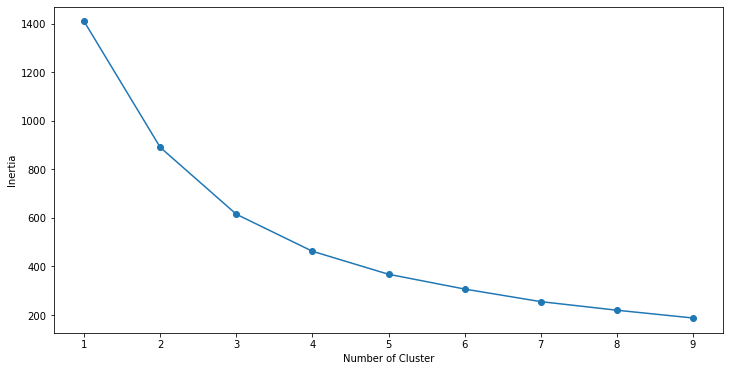

In [53]:
frame = pd.DataFrame({'Cluster':range(1,10) , 'SSE':SSE})
plt.figure(figsize = (12,6))
plt.plot(frame['Cluster'] , frame['SSE'] , marker = 'o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')

In [54]:
model= KMeans(n_clusters = 5 , init = 'k-means++')
model.fit(customers_normalized)

KMeans(n_clusters=5)

In [55]:
print(silhouette_score(customers_normalized , model.labels_ , metric='euclidean'))

0.4871689891760732


In [56]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(customers_fix)

In [57]:
features = range(pca.n_components_)

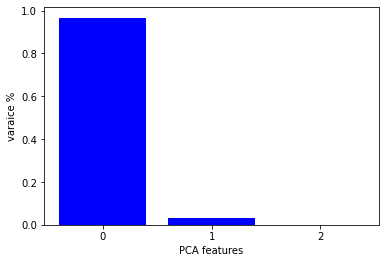

In [58]:
plt.bar(features , pca.explained_variance_ratio_ , color = 'blue')
plt.xlabel('PCA features')
plt.ylabel('varaice %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

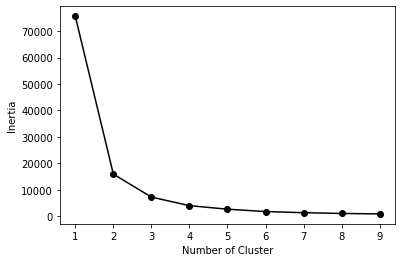

In [59]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[: , :1])
    inertias.append(model.inertia_)
    
plt.plot(ks , inertias , '-o' , color = 'black')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show

In [60]:
model_final =  KMeans(n_clusters = 3)
model_final.fit(PCA_components.iloc[: ,:1])
print(silhouette_score((PCA_components.iloc[: ,:1]) , model_final.labels_ , metric='euclidean'))

0.6469991690275202


In [61]:
clusters = model_final.fit_predict((PCA_components.iloc[: ,:1]))

In [62]:
customers['label'] = clusters

In [63]:
customers.groupby('label').agg({
    'Recency' : 'mean',
     'Frequency'  : 'mean',
     'MonetaryValue':['mean' , 'count']}).round(2)

Recency Frequency MonetaryValue      
         mean      mean          mean count
label                                      
0      129.71      1.47        190.11   153
1      397.40      1.47        325.56   222
2       27.25      2.16        130.25    95

In [64]:
customers

,Recency,Frequency,MonetaryValue,label
Entity: Name (Grouped),,,,
ALICIA FREILE,500,1,22.56,1
Adam Kornafel,259,1,89.66,1
Aimee Torruellas,52,1,36.27,2
Alan Simons,13,1,18.33,2
Alejandro Rincon,440,1,71.76,1
Alexa Kemp,497,2,108.96,1
Alexandra Riker,135,5,35.91,0
Alice Kline,2,2,112.66,2
Alice Kuniholm,398,1,216.95,1
